In [1]:
import boto3
from dotenv import load_dotenv
import os
import logging
import matplotlib.pyplot as plt
from typing import Dict, Any, Optional, List
import pandas as pd
import numpy as np
import seaborn as sns

plt.style.use("ggplot")

# Configure the logging system
logging.basicConfig(
    level=logging.INFO # We set the logging level to INFO so that INFO and above messages are logged
)

logger = logging.getLogger(__name__)

load_dotenv()

LOCAL_DIR = "data"

In [3]:
os.listdir(LOCAL_DIR)

['feature_frame.parquet', 'feature_frame.csv']

In [4]:

bb_df = pd.read_parquet("data/feature_frame.parquet")

In [8]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

In [56]:
bb_df[["variant_id","order_id","outcome"]].head()

,variant_id,order_id,outcome
0,33826472919172,2807985930372,0.0
1,33826472919172,2808027644036,0.0
2,33826472919172,2808099078276,0.0
3,33826472919172,2808393957508,0.0
4,33826472919172,2808429314180,0.0


In [ ]:
bb_df.drop_duplicates()

In [62]:
bb_df.groupby(["order_id"])["outcome"].sum().reset_index()

,order_id,outcome
0,2807985930372,9.0
1,2808027644036,6.0
2,2808099078276,9.0
3,2808393957508,13.0
4,2808429314180,3.0
...,...,...
3441,3643254800516,9.0
3442,3643274788996,5.0
3443,3643283734660,21.0
3444,3643294515332,7.0


In [65]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

In [67]:
info_cols = ["variant_id","order_id","user_id","created_at","order_date"]
label_col = "outcome"
feature_cols = [col for col in bb_df.columns if col not in info_cols + [label_col]]

categorical_cols = ["product_type","vendor"]
binary_cols = ["ordered_before","abandoned_before","active_snoozed","set_as_regular"]
numerical_cols = [col for col in feature_cols if col not in categorical_cols + binary_cols]

In [70]:
bb_df[feature_cols]

,product_type,user_order_seq,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,discount_pct,vendor,global_popularity,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,ricepastapulses,3,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.000000,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
1,ricepastapulses,2,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.000000,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
2,ricepastapulses,4,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.000000,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
3,ricepastapulses,2,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.038462,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
4,ricepastapulses,3,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.038462,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880544,healthcarevitamins,3,0.0,0.0,0.0,0.0,0.417186,0.114360,colief,0.000000,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880545,healthcarevitamins,4,0.0,0.0,0.0,0.0,0.417186,0.114360,colief,0.000000,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880546,healthcarevitamins,7,0.0,0.0,0.0,0.0,0.417186,0.114360,colief,0.000000,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880547,healthcarevitamins,2,0.0,0.0,0.0,0.0,0.417186,0.114360,colief,0.000000,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392


In [71]:
bb_df.product_type.unique()

array(['ricepastapulses', 'snacksconfectionery', 'dishwasherdetergent',
       'cleaningaccessories', 'fabricconditionerfreshener', 'coffee',
       'femininecare', 'bathroomlimescalecleaner', 'handsoapsanitisers',
       'tinspackagedfoods', 'toiletroll', 'kitchenrolltissues', 'binbags',
       'windowglasscleaner', 'homebaking', 'tea', 'jamhoneyspreads',
       'washingliquidgel', 'longlifemilksubstitutes', 'allpurposecleaner',
       'softdrinksmixers', 'condimentsdressings', 'babyfood6months',
       'kidssnacks', 'cookingingredientsoils', 'floorcleanerpolish',
       'cereal', 'driedfruitsnutsseeds', 'pickledfoodolives', 'catfood',
       'cookingsaucesmarinades', 'juicesquash', 'beer', 'kidsdental',
       'nappies', 'maternity', 'washingpowder', 'dental', 'haircare',
       'bathshowergel', 'kitchenovencleaner', 'wipescottonwool',
       'dogfood', 'babytoiletries', 'foodstorage', 'shavinggrooming',
       'petcare', 'deodorant', 'washingcapsules', 'bodyskincare',
       'delica

<Axes: xlabel='outcome'>

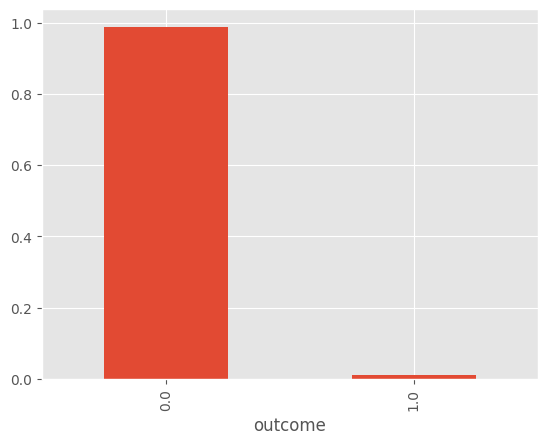

In [73]:
bb_df.outcome.value_counts(normalize=True).plot(kind="bar")